# EDA : Multi Class

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The goal of this project is to predict patient outcomes by estimating the probabilities of three possible classes for each identifier 

 Strategy : MThe model's performance is evaluated using the log loss (negative log-likelihood) metric, which quantifies the accuracy of predicted probabilities for each class.
 - The model outputs predicted classes as discrete labels (0, 1, or 2). These are then converted into probabilities using a one-hot encoding, where the predicted class gets a probability of 1, and the other classes get a probability of 0.

 
### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/saurabh00007/diabetescsv
- The data consists of 9 column and 2000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Fixing the directory path 
import os
os.chdir("C:/Users/RAZER BLADE/Downloads/AI Path/Multi-Class-Classification")

#### Import the CSV Data as Pandas DataFrame

In [3]:
data = pd.read_csv("Datasets/train.csv")

#### Show Top 5 Records

In [4]:
data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


Data shape

In [5]:
data.shape

(15000, 20)

### 2.2 Dataset information

#### Description des Variables :
- id : Identifiant unique du patient.
- N_Days : Nombre de jours, probablement lié à un suivi médical.
- Drug : Médicament administré ou traitement suivi par le patient.
- Age : Âge du patient.
- Sex : Sexe du patient (homme/femme).
- Ascites : Présence d'ascite (accumulation de liquide dans l'abdomen), souvent binaire (0 = non, 1 = oui).
- Hepatomegaly : Présence d'une hépatomégalie (foie élargi), souvent binaire.
- Spiders : Présence de "spiders" (angiomes stellaires), souvent binaire.
- Edema : Présence d'œdème (enflure causée par une rétention de liquide), souvent binaire ou catégorique.
- Bilirubin : Niveau de bilirubine dans le sang (lié à la fonction hépatique).
- Cholesterol : Niveau de cholestérol.
- Albumin : Niveau d'albumine dans le sang.
- Copper : Taux de cuivre dans le sang ou les urines.
- Alk_Phos : Niveau de phosphatase alcaline, un indicateur hépatique.
- SGOT : Niveau de SGOT (aspartate aminotransférase), un marqueur des dommages hépatiques.
- Tryglicerides : Niveau de triglycérides dans le sang.
- Platelets : Nombre de plaquettes dans le sang.
- Prothrombin : Temps de prothrombine (coagulation), un indicateur de la fonction hépatique.
- Stage : Stade de la maladie (souvent 1-4 pour des maladies hépatiques).
- Status (Target) : Variable cible indiquant l’état du patient :

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check the target 

### 3.1 Check Missing values

In [7]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

Tryglicerides    55.800000
Cholesterol      55.540000
Copper           43.653333
Spiders          42.966667
SGOT             42.966667
Alk_Phos         42.946667
Ascites          42.913333
Drug             42.906667
Hepatomegaly     42.906667
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
id                0.000000
Albumin           0.000000
N_Days            0.000000
Bilirubin         0.000000
Edema             0.000000
Sex               0.000000
Age               0.000000
Status            0.000000
dtype: float64

#### Insights : 
- There are 2 variables with 55% of Nan  values whoch are : Tryglicerides, Cholesterol : elles appartiennent toutes deux à la classe des lipides (graisses) dans le sang.
- There are 7 variables with 42/43% of Nan values which are : Copper, Spiders, SGOT, alk_Phos, ascites, Drug, Hepatomegaly.
- 2 variables with less than 4% of Nan values : Platelets, Prothrombin.

<Axes: >

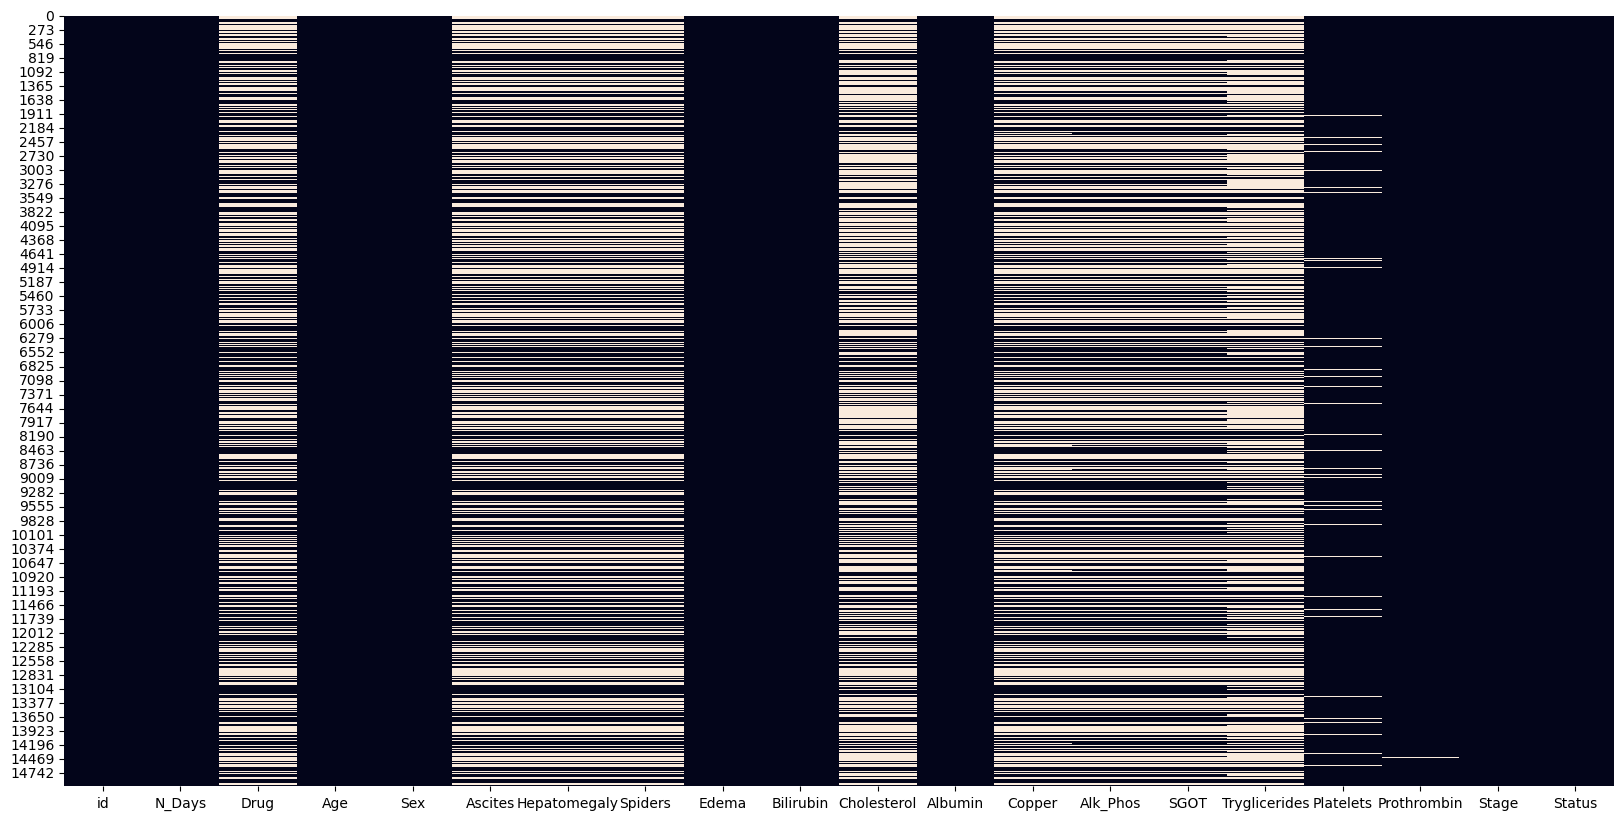

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

Status
C     0.672767
D     0.292995
CL    0.034238
Name: proportion, dtype: float64

In [87]:
# Not missing 
not_missing = data.dropna(axis=0)
print(not_missing['Status'].value_counts(normalize=True))
print('--------------------')

# Understanding missing values 
missing = data[data.isnull().any(axis=1)]
print(missing['Status'].value_counts(normalize=True))

Status
C     0.672767
D     0.292995
CL    0.034238
Name: proportion, dtype: float64
--------------------
Status
C     0.667860
D     0.312053
CL    0.020088
Name: proportion, dtype: float64


### 3.2 Check Duplicates


In [ ]:
print(data.duplicated().sum())

0


#### No duplicated Data in out Dataset

### 3.3 Check data types

In [9]:
data.info()
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

float64    12
object      7
int64       1
Name: count, dtype: int64

#### We have numerical Data, 12 float and 1 integer type. and Categorical Data 7 object type

### 3.4 Checking the number of unique values of each column

In [10]:
data.nunique()

id               15000
N_Days             543
Drug                 2
Age                375
Sex                  2
Ascites              4
Hepatomegaly         3
Spiders              2
Edema                3
Bilirubin          118
Cholesterol        210
Albumin            165
Copper             170
Alk_Phos           387
SGOT               201
Tryglicerides      153
Platelets          267
Prothrombin         54
Stage                4
Status               3
dtype: int64

#### We dont have a lot of different values for, maybe we can use the Binning technique (grouping variables in ranges)

### 3.5 Check statistics of data set

### 3.5.1 Numerical Variables

Checks : 
- 1. Colonnes avec des valeurs manquantes : Compare le count au nombre total de lignes dans ton dataset. Si le count est inférieur à ce nombre, cela indique des valeurs manquantes.
- 2. Étendue des valeurs (min, max) : Analyse les colonnes où la différence entre les valeurs minimale et maximale (min, max) est très grande. Cela peut indiquer : Une possible échelle disproportionnée. La nécessité d'une normalisation ou d'une standardisation.
- 3. Dispersion (std - écart-type) : Les colonnes avec un écart-type élevé (std) montrent une grande variation dans les valeurs. Vérifie si cette dispersion est logique.
- 4. Mode et médiane (50%) : La comparaison entre la médiane (50%) et la moyenne (mean) peut indiquer si les données sont symétriques ou biaisées (présence d'une queue asymétrique).
- 5. Valeurs aberrantes possibles : Les colonnes avec des valeurs max très éloignées de la médiane et des quartiles (25%, 75%) peuvent contenir des outliers (valeurs aberrantes).

In [55]:
summary = (data.loc[:, 'N_Days':]).describe()

# Adding the mode to the statistics is always a good practice
modes = data.mode()

# This is just a code that add the mode to the summary dataframe
row_mode = {} # Setting up the dictionnary of the new modes raw 
for key, val in zip(data.columns.to_list(), modes.iloc[0].to_list()):
    row_mode[key] = val
summary.loc['mode'] = row_mode
summary


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,3.025667
std,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,0.877796
min,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,4.000000
max,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000
mode,2149.000000,23376.000000,0.600000,263.000000,3.400000,20.000000,663.000000,57.350000,85.000000,269.000000,10.600000,3.000000


#### Insighs
- 1. Age: minimum = 133 amd max to 35k (impossible) ---> error in Data.
- 2. N_Days : maximum is 40797 day which is 111,7 year (not relevant) ---> error in Data.
- 3. the variable Stage is more likely to be an int than float.
- 4. A global view tells that there are a lot of Outliers insignificant !

In [56]:
# Change varibale Stage to int
print(data['Stage'].unique())
print(data['Stage'].dtypes)
data['Stage'] = data['Stage'].astype('int')
print(data['Stage'].dtypes)

[3 4 2 1]
int32
int32


In [57]:
data['Stage'].dtypes

dtype('int32')

### 3.5.2 Categorical Variables

In [58]:
summary = data.describe(include=object)

# Adding the mode to the statistics is always a good practice
modes = data.mode()

# This is just a code that add the mode to the summary dataframe
row_mode = {} # Setting up the dictionnary of the new modes raw 
for key, val in zip(data.columns.to_list(), modes.iloc[0].to_list()):
    row_mode[key] = val
summary.loc['mode'] = row_mode
summary


,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
count,8564,15000,8563,8564,8555,15000,15000
unique,2,2,4,3,2,3,3
top,D-penicillamine,F,N,N,N,N,C
freq,4568,14403,8178,4564,6773,13823,10049
mode,D-penicillamine,F,N,N,N,N,C


### 3.6 Check Target

In [76]:
target = data[['Status']]

target.value_counts(normalize=True) 

Status
C         0.669933
D         0.304000
CL        0.026067
Name: proportion, dtype: float64

#### Binnary Outcome : 
- 67 are of class C. 
- 30,4% for class D.
- 2,6% of class CL 

Highly unbalenced classes!

### 4. Exploring Numerical Data ( Visualization ) 
- Histogram
- Kernel Distribution Function (KDE)

### 4.1 Univariate Analysis
- Visualizing the distribution of each feature: Using histograms or kernel density plots to examine the distributions.
- Separating distributions for each class  to observe patterns.
- Statistical summaries per class:
    - Group by Outcome and calculate mean, median, and variance for each feature.

### 4.2 Bivariate Analysis
Analyze the relationship between each feature and the target (Outcome):
- Boxplots: Plot each feature grouped by Outcome to see differences between classes.
- Violin plots: Visualize both the distribution and spread of values for features across classes.

- Correlation Analysis:
    - Compute Pearson/Spearman correlation between numerical features and Outcome.
    - Use a heatmap to visualize correlations between all numerical features and highlight multicollinearity.
- Perform hypothesis tests (e.g., t-tests or Mann-Whitney U tests) to assess if feature distributions differ significantly between classe

#### 4.3 Multivariate Analysis
- Pairwise plots: Use scatterplot matrices (sns.pairplot) to observe relationships between features, coloring by Outcome.
- Dimensionality Reduction: Apply PCA or t-SNE to visualize clusters in a reduced feature space, distinguishing between Outcome=0 and Outcome=1.

### 4.1 Univariate Analysis

#### 4.1.1 Histogram & KDE of the features

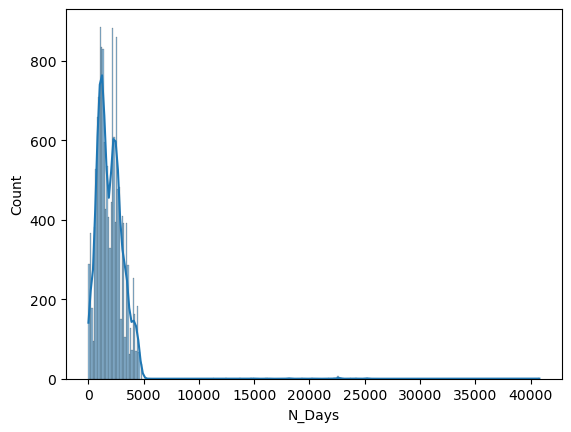

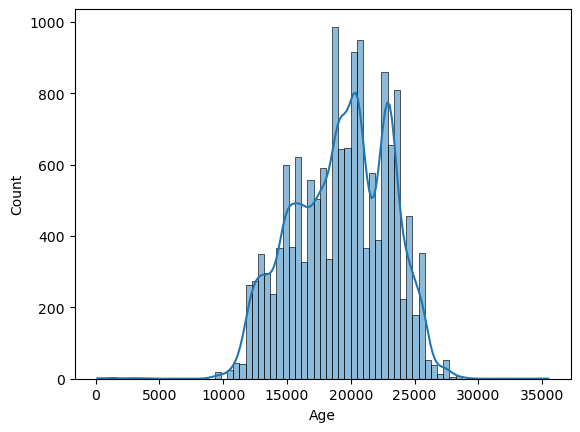

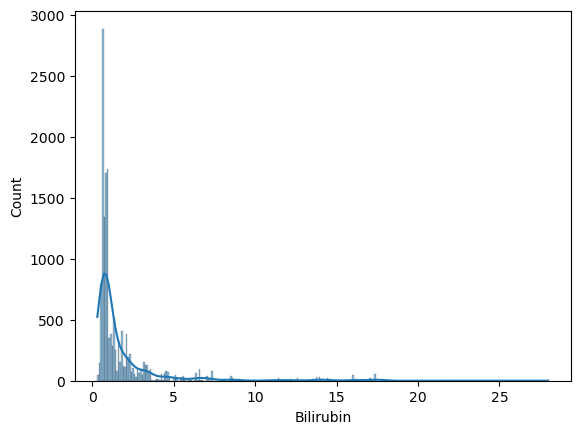

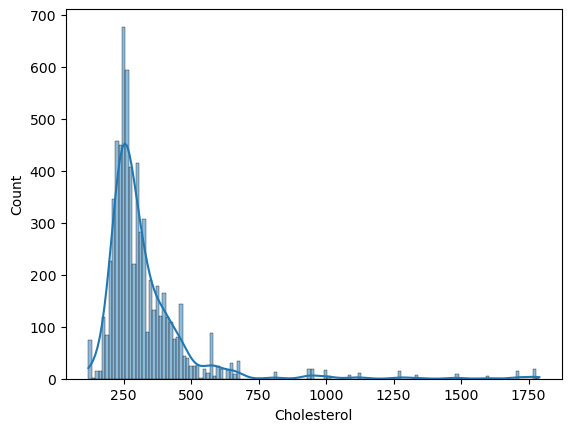

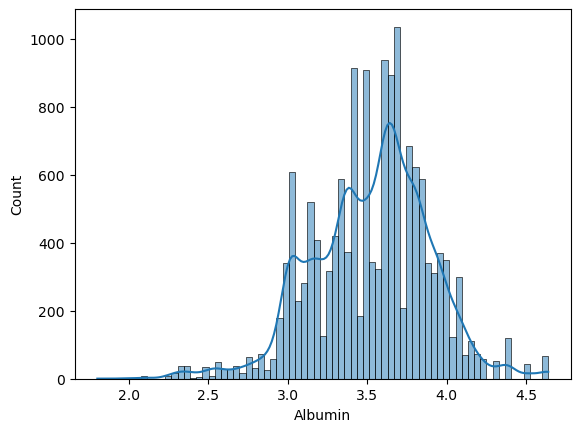

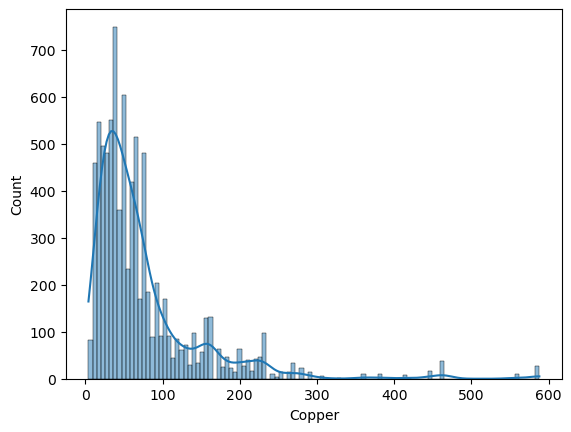

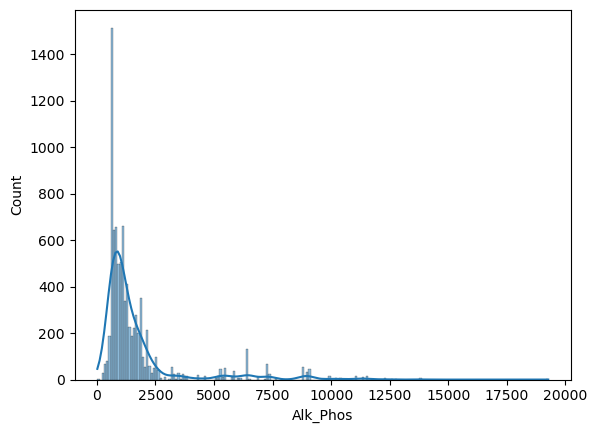

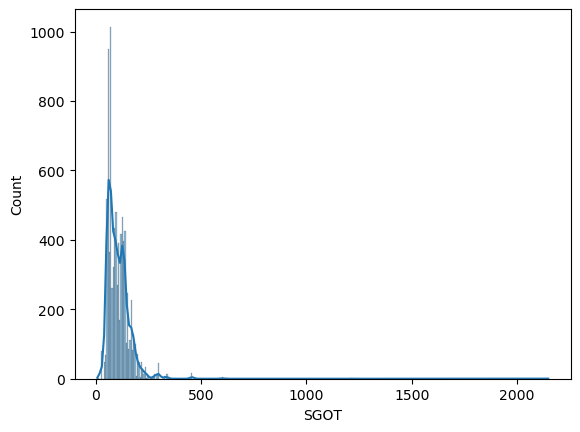

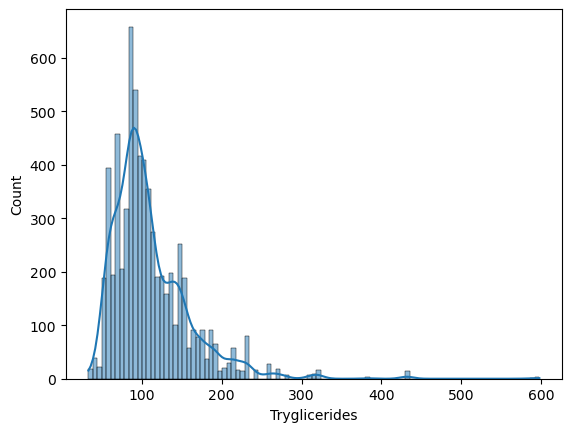

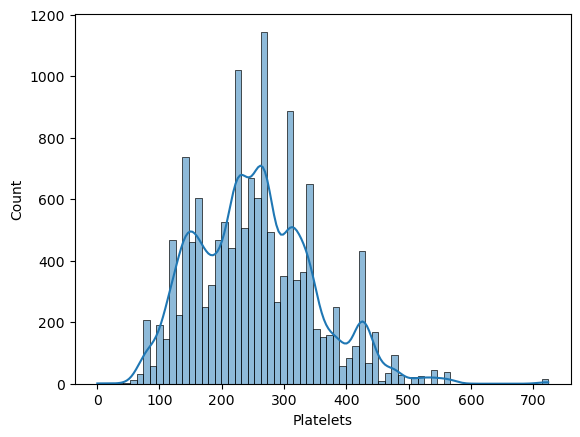

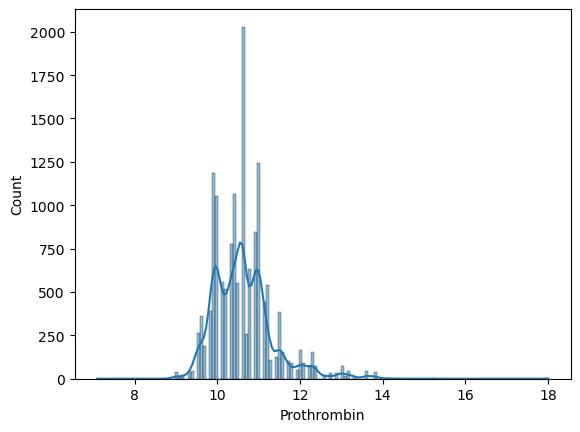

In [16]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.histplot(data[col], kde=True)

#### Insights : 
- N_days after 5k seems to be outliers.
- Age between 10 and 30k.
- bilirubin 15 to 20 max.
- cholesterol 1100.
- copper after 300
- alk bet 7,5 to 10k
- sgot after 500 pr less (300)
- Tryg after 300 to 400
- proth 9 to 14.


#### 4.1.2 Separating distributions for each class (Outcome=0 vs. Outcome=1) to observe patterns.

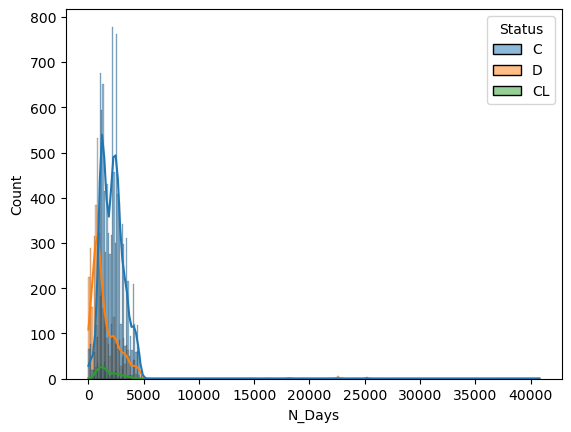

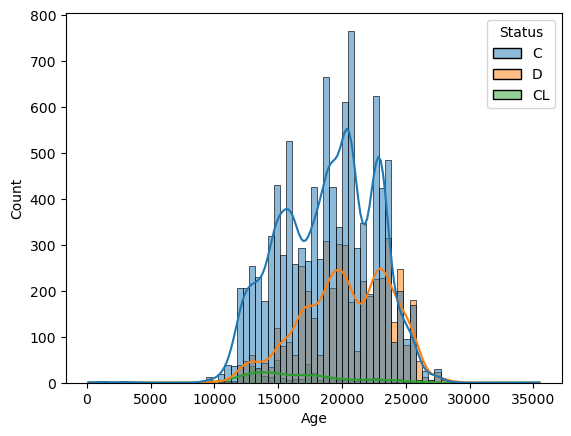

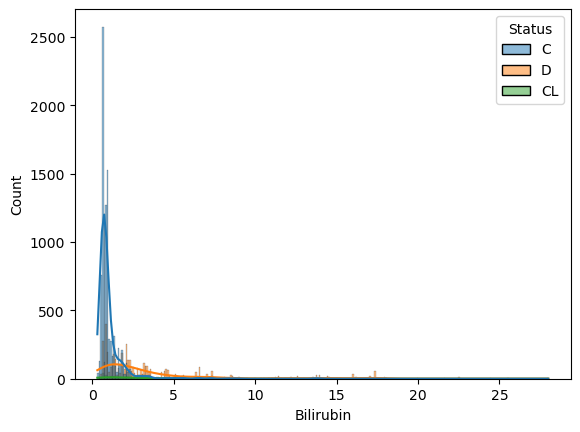

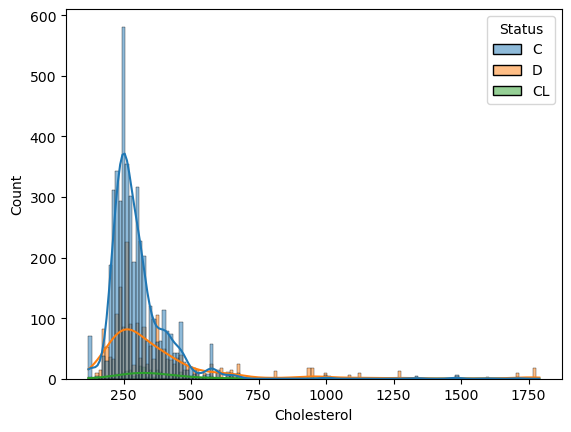

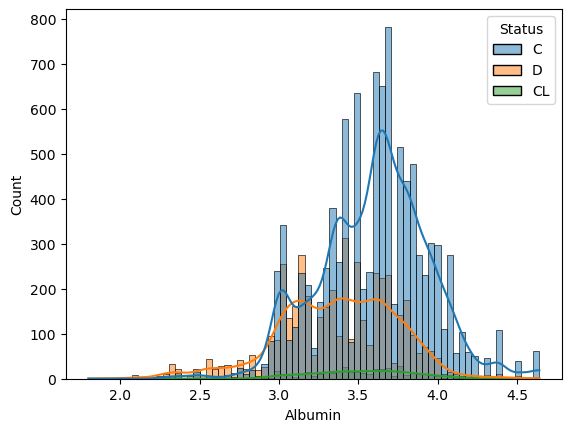

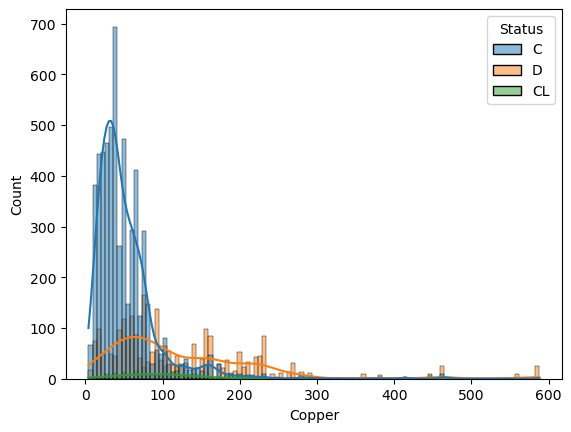

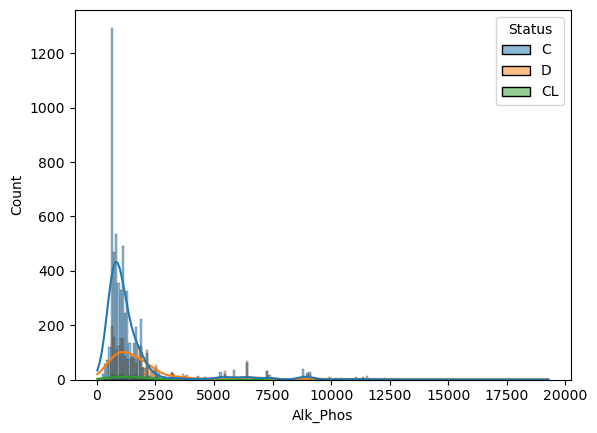

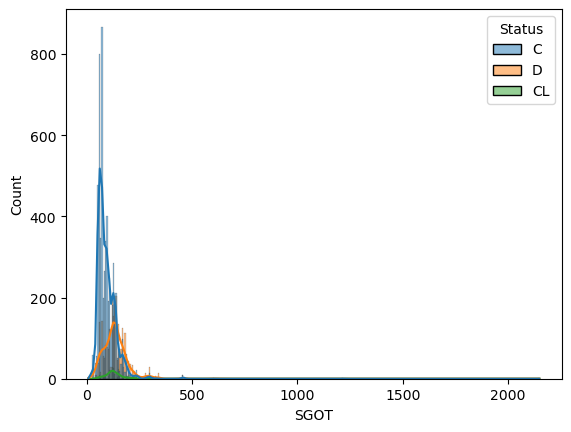

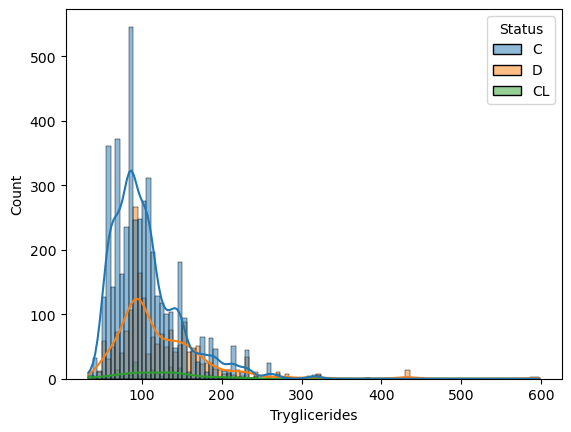

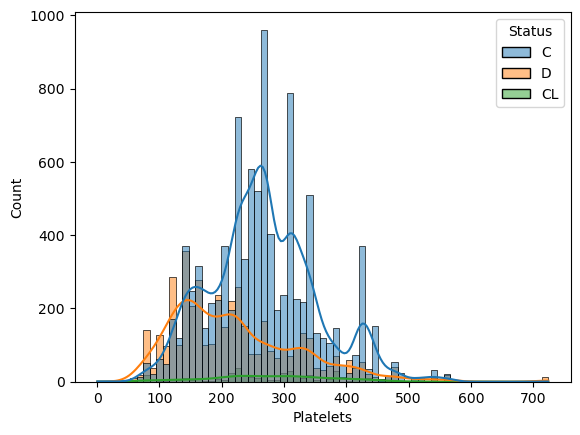

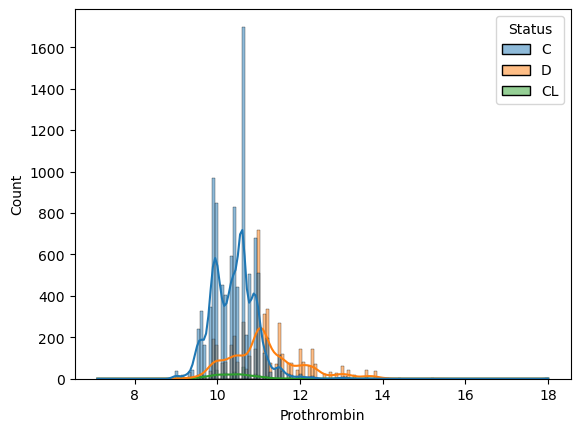

In [17]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.histplot(data, x=col, kde=True, hue='Status')

#### Insights : 

 #### 4.1.3 Statistical summaries per class

In [18]:
C = data[data['Status']=='C']
D = data[data['Status']=='D']
CL = data[data['Status']=='CL']

#### Class C 

In [19]:
display(C.describe())

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,10049.000000,10049.000000,10049.000000,10049.000000,4526.000000,10049.000000,5758.000000,5816.000000,5814.000000,4504.000000,9673.000000,10037.000000,10049.000000
mean,7483.201712,2205.894019,18870.176366,1.061449,301.559213,3.597517,52.524488,1445.776066,93.721500,104.314554,266.761791,10.397479,2.791223
std,4336.740389,1261.003187,3663.606142,1.253151,118.151194,0.346490,44.804592,1661.249894,44.717162,43.059158,86.370427,0.533797,0.845322
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.960000,4.000000,108.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,3721.000000,1363.000000,16071.000000,0.600000,239.000000,3.370000,28.000000,675.500000,65.100000,75.000000,213.000000,10.000000,2.000000
50%,7480.000000,2168.000000,19155.000000,0.800000,273.000000,3.630000,41.000000,955.000000,83.700000,95.000000,265.000000,10.400000,3.000000
75%,11233.000000,2796.000000,21904.000000,1.000000,328.000000,3.820000,65.000000,1345.000000,116.250000,119.000000,314.000000,10.700000,3.000000
max,14999.000000,40795.000000,35472.000000,25.500000,1712.000000,4.640000,588.000000,13862.400000,1214.000000,382.000000,721.000000,18.000000,4.000000


#### Insights : 

#### Class D

In [20]:
display(D.describe())

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,4560.000000,4560.000000,4560.000000,4560.000000,1925.000000,4560.000000,2453.000000,2499.000000,2499.000000,1909.000000,4355.000000,4546.000000,4560.000000
mean,7528.425000,1457.154605,20311.667171,3.579561,383.301818,3.366752,122.820220,2172.474750,134.487995,122.663698,222.989185,11.153586,3.537281
std,4325.560895,1442.482163,3489.787695,4.061336,264.093210,0.374373,98.990368,2177.896512,70.187671,59.947173,102.571683,0.872257,0.723385
min,5.000000,8.000000,133.300000,0.400000,127.000000,1.800000,4.000000,16.000000,26.350000,33.000000,34.000000,9.000000,1.000000
25%,3768.000000,691.000000,17887.750000,1.100000,244.000000,3.130000,57.000000,944.000000,97.650000,90.000000,142.000000,10.600000,3.000000
50%,7528.500000,1000.000000,20454.000000,2.100000,300.000000,3.400000,94.000000,1441.000000,130.200000,102.000000,206.000000,11.000000,4.000000
75%,11279.250000,2111.000000,23011.000000,4.000000,408.000000,3.630000,161.000000,2184.000000,159.650000,149.000000,283.000000,11.500000,4.000000
max,14998.000000,23741.000000,28650.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000


#### Insights : 

### Class CL

In [21]:
CL.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,391.000000,391.000000,391.000000,391.000000,218.000000,391.000000,241.000000,243.000000,242.000000,217.000000,386.000000,391.000000,391.000000
mean,7581.043478,1773.214834,16572.713555,2.385243,378.527523,3.518849,115.282158,1784.847737,127.296322,125.677419,277.424870,10.425064,3.084399
std,4225.662208,930.572052,3681.330637,2.606279,199.107968,0.323538,92.429180,1859.028693,38.585834,54.786937,96.991716,0.550558,0.791323
min,35.000000,111.000000,9598.000000,0.300000,120.000000,2.380000,10.000000,310.000000,54.250000,33.000000,76.000000,9.500000,1.000000
25%,4029.000000,1046.000000,13514.000000,0.900000,280.250000,3.295000,63.000000,938.000000,108.875000,90.000000,220.000000,10.000000,2.000000
50%,7521.000000,1478.000000,15548.000000,1.600000,328.500000,3.530000,100.000000,1307.000000,122.450000,118.000000,278.000000,10.400000,3.000000
75%,11413.000000,2452.000000,18673.500000,3.200000,412.000000,3.760000,123.000000,1692.000000,150.350000,146.000000,344.000000,10.650000,4.000000
max,14969.000000,4795.000000,27394.000000,18.000000,1775.000000,4.640000,464.000000,11320.200000,299.150000,382.000000,539.000000,13.200000,4.000000


### 4.2 Bivariate Analysis


Analyze the relationship between each feature and the target (Outcome):
- Boxplots: Plot each feature grouped by Outcome to see differences between classes.
- Violin plots: Visualize both the distribution and spread of values for features across classes.

- Correlation Analysis:
    - Compute Pearson/Spearman correlation between numerical features and Outcome.
    - Use a heatmap to visualize correlations between all numerical features and highlight multicollinearity.
- Perform hypothesis tests (e.g., t-tests or Mann-Whitney U tests) to assess if feature distributions differ significantly between classe

### 4.2.1 Boxplots and violinplots grouped by Target



In [ ]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.boxplot(data, x=col, hue='Status')

#### Insights : 

In [ ]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.violinplot(data, x=col, hue='Status')

#### Insights : 

### 4.2.2 Correlation Analysis:

#### Using a heatmap to visualize correlations between all numerical features and highlight multicollinearity.

In [ ]:
sns.heatmap(data.select_dtypes(['float', 'int']).corr(), cbar=True, cmap="plasma")

#### Insights : 

### 5. Exploring Categorical Data 

In [25]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

Drug---------------------------------------------- [nan 'Placebo' 'D-penicillamine']
Sex----------------------------------------------- ['F' 'M']
Ascites------------------------------------------- [nan 'N' 'Y' 'S' 'D-penicillamine']
Hepatomegaly-------------------------------------- [nan 'Y' 'N' '119.35']
Spiders------------------------------------------- [nan 'Y' 'N']
Edema--------------------------------------------- ['N' 'Y' 'S']
Status-------------------------------------------- ['C' 'D' 'CL']


#### Insights :
- The variable Hepatomegaly has a numerical variable 119.35 


In [26]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())

Drug
D-penicillamine    4568
Placebo            3996
Name: count, dtype: int64
Sex
F    14403
M      597
Name: count, dtype: int64
Ascites
N                  8178
Y                   383
S                     1
D-penicillamine       1
Name: count, dtype: int64
Hepatomegaly
N         4564
Y         3999
119.35       1
Name: count, dtype: int64
Spiders
N    6773
Y    1782
Name: count, dtype: int64
Edema
N    13823
S      811
Y      366
Name: count, dtype: int64
Status
C     10049
D      4560
CL      391
Name: count, dtype: int64


In [ ]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.bar()

# Data Prerocessing 

In [28]:
df = data.copy()
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3,C


Dropping the Age Vriable 

In [29]:
df = df.drop(['Age'], axis=1)

The Variable N_days

In [30]:
# The Outliers are just 27 we can ether drop them or winsorize
len(df[df['N_Days'] > 5000][['N_Days']])

27

Hepatomegaly numerical value

In [31]:
# Either remove it or replace with mode 
len(df[df['Hepatomegaly'] == '119.35']['Hepatomegaly'])


1

In [32]:
df.loc[df['Hepatomegaly'] == '119.35', 'Hepatomegaly'] = df['Hepatomegaly'].mode()[0]
# Check
len(df[df['Hepatomegaly'] == '119.35']['Hepatomegaly'])

0

## Nan Values 
Filling with median/mode

In [33]:
df_fill = df.copy()

In [34]:
for col in df_fill.columns:
    if df_fill[col].isna().any():
        if col in list(df_fill.select_dtypes(['float', 'int']).columns):
            df_fill[col] = df_fill[col].fillna(df_fill[col].median())
        elif col in list(df_fill.select_dtypes('object').columns):
            df_fill[col] = df_fill[col].fillna(df_fill[col].mode()[0])
df_fill.isna().any()

id               False
N_Days           False
Drug             False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
Status           False
dtype: bool

In [35]:
df.describe()

,id,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000,15000.000000
mean,7499.500000,1966.998733,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748,3.025667
std,4330.271354,1355.897299,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888,0.877796
min,0.000000,3.000000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000,1.000000
25%,3749.750000,1092.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1785.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2635.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,40795.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000,4.000000


##### Filling Nan Values with Models

# Outliers

In [36]:
def extract_outliers_from_boxplot(array):
    ## Get IQR
    q1 = np.quantile(array, 0.25)
    q3 = np.quantile(array, 0.75)
    med = np.median(array)

    # finding the iqr region
    iqr = q3 - q1

    # finding upper and lower whiskers
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)

    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    outliers = pd.DataFrame(outliers)
    outliers.columns = [array.name + ' outliers']
    print('Number of Outliers within the box plot are :{}'.format(outliers.shape[0]))
    

extract_outliers_from_boxplot(df_fill['N_Days'])

Number of Outliers within the box plot are :27


In [37]:
for col in list(df_fill.select_dtypes(['float', 'int']).columns):
    print(col)
    extract_outliers_from_boxplot(df_fill[col])
    

id
Number of Outliers within the box plot are :0
N_Days
Number of Outliers within the box plot are :27
Bilirubin
Number of Outliers within the box plot are :1424
Cholesterol
Number of Outliers within the box plot are :15000
Albumin
Number of Outliers within the box plot are :321
Copper
Number of Outliers within the box plot are :5242
Alk_Phos
Number of Outliers within the box plot are :5243
SGOT
Number of Outliers within the box plot are :4730
Tryglicerides
Number of Outliers within the box plot are :15000
Platelets
Number of Outliers within the box plot are :158
Prothrombin
Number of Outliers within the box plot are :417
Stage
Number of Outliers within the box plot are :0


In [38]:
df_fill.describe()

,id,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,7499.500000,1966.998733,1.861462,301.194133,3.525314,64.799533,1411.812667,102.742817,103.993317,253.71178,10.627700,3.025667
std,4330.271354,1355.897299,2.752375,122.201861,0.369981,56.833189,1436.785764,42.891338,33.498046,92.22058,0.741245,0.877796
min,0.000000,3.000000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.40000,7.100000,1.000000
25%,3749.750000,1092.000000,0.600000,280.000000,3.290000,48.000000,983.000000,89.900000,99.000000,190.00000,10.100000,2.000000
50%,7499.500000,1785.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.00000,10.600000,3.000000
75%,11249.250000,2635.000000,1.800000,280.000000,3.770000,58.000000,1142.000000,104.490000,99.000000,311.00000,11.000000,4.000000
max,14999.000000,40795.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.00000,18.000000,4.000000


# Feature Engineering 

In [39]:
X = df_fill.drop(['Status', 'id'], axis=1)

In [40]:
Y = df_fill['Status']

## 1. Encoding 

In [41]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)
def encodage(df):
    code = {True:1,
            False:0}
    
    for col in df.select_dtypes(['object', 'bool']).columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

X_encoded = encodage(X_encoded)
X_encoded



,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_N,Ascites_S,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1055.0,1.3,280.0,3.64,52.0,1072.0,97.65,99.0,209.0,10.5,...,1,0,0,1,0,1,0,1,0,0
1,3282.0,0.7,309.0,3.60,96.0,1142.0,71.30,106.0,240.0,12.4,...,1,0,0,0,1,0,1,1,0,0
2,1653.0,2.2,280.0,3.64,52.0,1072.0,97.65,99.0,139.0,9.5,...,1,0,0,1,0,1,0,1,0,0
3,999.0,1.0,498.0,3.35,89.0,1601.0,164.30,85.0,394.0,9.7,...,1,0,0,0,1,1,0,1,0,0
4,2202.0,17.2,280.0,3.15,52.0,1072.0,97.65,99.0,432.0,11.2,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1831.0,1.0,322.0,3.68,52.0,1257.0,60.45,213.0,228.0,9.9,...,1,0,0,1,0,0,1,1,0,0
14996,611.0,1.8,280.0,3.14,18.0,976.0,97.65,99.0,126.0,11.0,...,0,0,1,0,1,1,0,0,0,1
14997,3098.0,0.9,348.0,3.93,464.0,933.0,120.00,146.0,322.0,10.6,...,1,0,0,0,1,0,1,1,0,0
14998,4453.0,2.1,280.0,3.63,52.0,1072.0,97.65,99.0,233.0,11.0,...,1,0,0,1,0,1,0,1,0,0


In [42]:
Y

0        C
1        C
2        C
3        C
4        C
        ..
14995    C
14996    D
14997    C
14998    D
14999    C
Name: Status, Length: 15000, dtype: object

In [43]:
code = {'C':1, 'D':0, 'CL':2}
Y = Y.map(code)

In [44]:
Y.value_counts()

Status
1    10049
0     4560
2      391
Name: count, dtype: int64

# 2. Scaling 

In [45]:
from sklearn.model_selection import train_test_split

X_train,  X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=.2, random_state=8)
print('Trainning Shape', X_train.shape, Y_train.shape)
print('Trainning Shape', X_test.shape, Y_test.shape)

Trainning Shape (12000, 26) (12000,)
Trainning Shape (3000, 26) (3000,)


In [46]:
from sklearn.preprocessing import RobustScaler
X_train_tf = X_train.copy()
X_test_tf = X_test.copy()

numerical_features = list(X_train.select_dtypes('float').columns)
#only scale numeric varaibles in this case rather than the dummy variables for categories 
rob = RobustScaler()
X_train_tf.loc[:, numerical_features] = rob.fit_transform(X_train_tf.loc[:, numerical_features])
X_test_tf.loc[:, numerical_features] = rob.transform(X_test_tf.loc[:, numerical_features])

In [47]:
X_train_tf

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,...,Ascites_N,Ascites_S,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
6544,0.125644,-0.166667,0.0,-0.604167,0.000000,0.000000,0.000000,0.0,0.239669,-0.777778,...,1,0,0,1,0,1,0,1,0,0
2135,-0.235825,0.083333,0.0,-1.187500,0.000000,0.000000,0.000000,0.0,-0.925620,-0.777778,...,1,0,0,1,0,1,0,1,0,0
857,-0.610825,2.166667,-21.0,-0.791667,32.666667,39.025157,2.230980,-21.0,-0.363636,0.555556,...,1,0,0,0,1,0,1,1,0,0
5609,0.567655,-0.083333,-28.0,0.062500,0.500000,1.037736,5.205620,-36.0,0.743802,0.000000,...,1,0,0,0,1,0,1,1,0,0
1742,-0.704897,0.750000,0.0,0.041667,0.000000,0.000000,0.000000,0.0,-0.900826,-0.222222,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,1.313144,-0.166667,-63.0,0.145833,-1.416667,4.496855,0.637423,47.0,0.438017,-1.111111,...,1,0,0,1,0,1,0,1,0,0
10601,1.452320,0.000000,-32.0,0.937500,-2.666667,-2.704403,-2.802605,-4.0,-0.190083,1.111111,...,1,0,0,1,0,1,0,1,0,0
2033,-0.269330,-0.083333,0.0,-0.375000,0.000000,0.000000,0.000000,0.0,-0.644628,-0.222222,...,1,0,0,1,0,1,0,1,0,0
9556,0.329897,-0.166667,2.0,-0.791667,0.000000,50.281761,-1.741604,12.0,2.578512,0.111111,...,1,0,0,0,1,1,0,1,0,0


In [48]:
Y_train

6544     1
2135     1
857      2
5609     1
1742     0
        ..
2181     1
10601    1
2033     1
9556     0
4547     1
Name: Status, Length: 12000, dtype: int64

# Model Trainning

In [49]:
def log_loss(Y_test, y_pred_proba):
    """
    Calcule l'opposé de la log-vraisemblance pour un problème de classification multiclasse.
    
    :param Y_test: ndarray de shape (N, M), les vérités terrain encodées en one-hot (1 pour la classe vraie, 0 sinon).
    :param y_pred: ndarray de shape (N, M), les probabilités prédites pour chaque classe.
                   Chaque ligne doit contenir les probabilités non normalisées.
    :return: float, la log-vraisemblance négative normalisée.
    """
    # Normaliser les probabilités
    y_pred_proba = y_pred_proba / np.sum(y_pred_proba, axis=1, keepdims=True)
    
    # Éviter les extrêmes du logarithme
    epsilon = 1e-15
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)

    N = Y_test.shape[0]
    M = y_pred_proba.shape[1]
    y_one_hot = np.zeros((N, M))
    y_one_hot[np.arange(N), Y_test] = 1
    
    # Calcul de la log-vraisemblance
    log_loss = -np.sum(y_one_hot * np.log(y_pred_proba)) / Y_test.shape[0]
    
    return log_loss

In [50]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def evaluate_model(Y_test, Y_pred, y_pred_proba):

    loglosss = log_loss(Y_test, y_pred_proba)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='micro')
    recall = recall_score(Y_test, Y_pred, average='micro')
    f1 = f1_score(Y_test, Y_pred, average='micro')
    
    #classification_reportt = classification_report(Y_test, Y_pred)
    return accuracy, precision, recall, f1, loglosss

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

# Initialize the models
models = {
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # Default k=5
    'Decision Tree': DecisionTreeClassifier(max_depth=None, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [52]:
X_test.shape

(3000, 26)

In [53]:
def trainning_models(models, X_train, Y_train, X_test, Y_test):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, Y_train) # Train model

        # Make predictions
        Y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        # Evaluate Train and Test dataset
        accuracy, precision, recall, f1, logloss = evaluate_model(Y_test, Y_pred, y_pred_proba)
        print(model)
        print("Accuracy: {0}".format(accuracy))
        print("Precision: {0}".format(precision))
        print("Recall: {0}".format(recall))
        print("f1: {0}".format(f1))
        print("logloss: {0}".format(logloss))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(Y_test.unique()), yticklabels=list(Y_test.unique()))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
        plt.gca().xaxis.tick_top()                # Move x-axis ticks to the top
        plt.show()

        print('='*35)
        print('\n')

KNeighborsClassifier()
Accuracy: 0.7903333333333333
Precision: 0.7903333333333333
Recall: 0.7903333333333333
f1: 0.7903333333333333
logloss: 2.4811748097775674


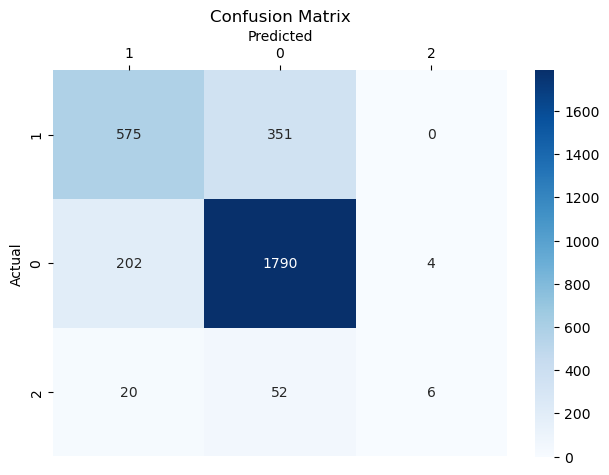



DecisionTreeClassifier(random_state=42)
Accuracy: 0.777
Precision: 0.777
Recall: 0.777
f1: 0.777
logloss: 7.702378185125269


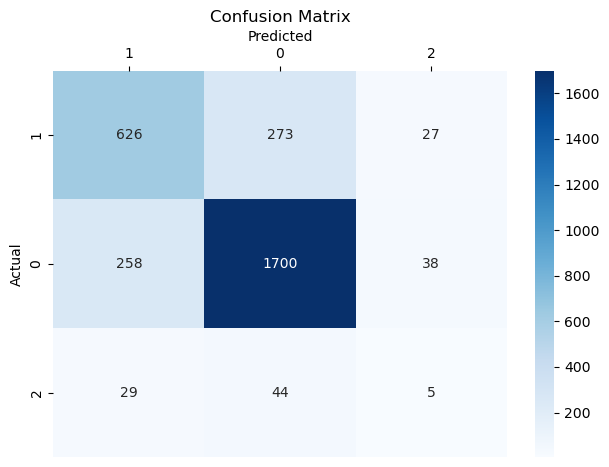



GaussianNB()
Accuracy: 0.542
Precision: 0.542
Recall: 0.542
f1: 0.542
logloss: 4.712124912397927


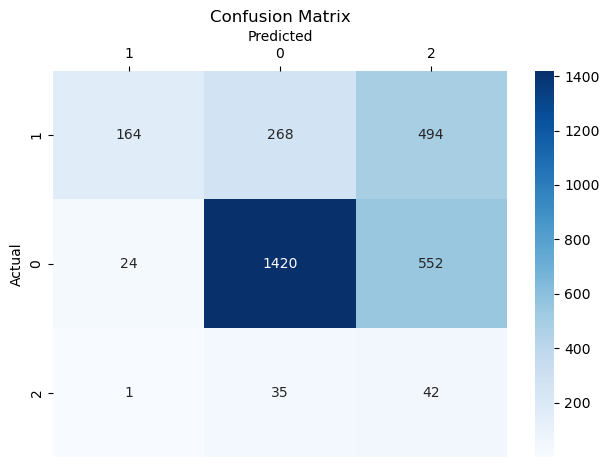



RandomForestClassifier(random_state=42)
Accuracy: 0.8453333333333334
Precision: 0.8453333333333334
Recall: 0.8453333333333334
f1: 0.8453333333333334
logloss: 0.49702591890189385


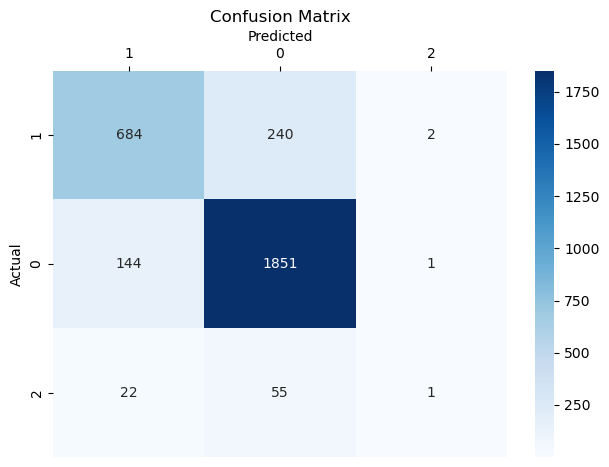



GradientBoostingClassifier(random_state=42)
Accuracy: 0.8526666666666667
Precision: 0.8526666666666667
Recall: 0.8526666666666667
f1: 0.8526666666666667
logloss: 0.39118980259043035


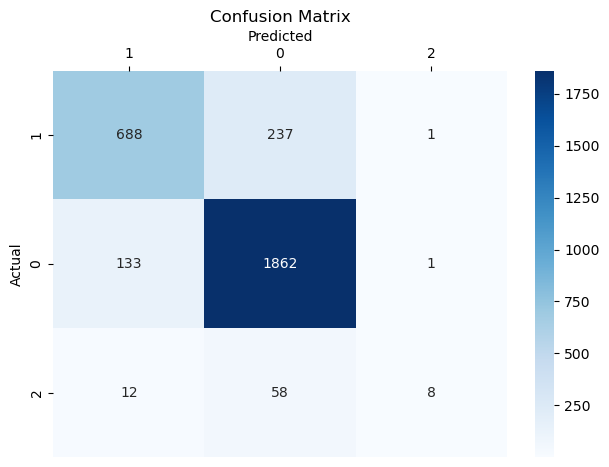

In [54]:
trainning_models(models, X_train_tf, Y_train.to_numpy(), X_test_tf, Y_test)